In [1]:

import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("StudentPerformance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape


(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
x = df["Previous Scores","Hours Studied","Sleep Hours","Sample Question Papers Practiced"]


KeyError: ('Previous Scores', 'Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced')

In [ ]:
y = df["Performance Index"]

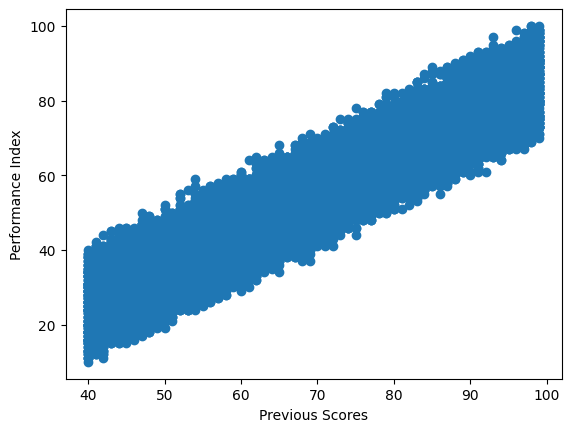

In [ ]:
plt.scatter(x,y)
plt.xlabel("Previous Scores","Hours Studied","Sleep Hours","Sample Question Papers Practiced")
plt.ylabel("Performance Index")
plt.show()

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
n = len(x)
split = int(0.8 * n)

In [ ]:
x_train = x[:split]
y_train = y[:split]

In [ ]:
x_test = x[split:]
y_test = y[split:]

In [ ]:
def norm(x):
    return (x-np.mean(x,axis=0))/np.std(x,axis=0)

In [ ]:
x_train = norm(x_train)
x_test = norm(x_test)


In [ ]:
def pred(w,b,x):
    y_pred = w * x + b
    return y_pred

In [ ]:
def cost(y_train,y_pred):
    err = y_pred - y_train
    cost = np.mean(np.square(err))
    return cost

In [ ]:
def gradient(err,x_train):
    dw = 2*(np.mean(err*x_train))
    db = 2*(np.mean(err))
    return dw,db

In [ ]:
def gradient_descent(w,b,dw,db,a):
    w = w - a * dw
    b = b - a * db
    return w,b

In [ ]:
def linear_regression(x,w,b,a,I,y):
    for i in range(I):
        y_pred = pred(w,b,x)
        Cost = cost(y,y_pred)
        err = y_pred - y
        dw,db = gradient(err,x)
        w,b = gradient_descent(w,b,dw,db,a)
        if(i%100==0):
            print(f'iteration: {i}----------- cost: {Cost}')
    return w,b

    



In [ ]:
w = 0
b = 0
a = 0.001
I = 2000
n_w,n_b = linear_regression(x,w,b,a,I,y)


iteration: 0----------- cost: 3418.864
iteration: 100----------- cost: 5.515025674328877e+196
iteration: 200----------- cost: inf
iteration: 300----------- cost: inf
iteration: 400----------- cost: nan


c:\Users\debna\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\debna\AppData\Local\Temp\ipykernel_3612\501151781.py:3: RuntimeWarning: overflow encountered in square
  cost = np.mean(np.square(err))
C:\Users\debna\AppData\Local\Temp\ipykernel_3612\917927332.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - a * dw


iteration: 500----------- cost: nan
iteration: 600----------- cost: nan
iteration: 700----------- cost: nan
iteration: 800----------- cost: nan
iteration: 900----------- cost: nan
iteration: 1000----------- cost: nan
iteration: 1100----------- cost: nan
iteration: 1200----------- cost: nan
iteration: 1300----------- cost: nan
iteration: 1400----------- cost: nan
iteration: 1500----------- cost: nan
iteration: 1600----------- cost: nan
iteration: 1700----------- cost: nan
iteration: 1800----------- cost: nan
iteration: 1900----------- cost: nan


In [ ]:
y_testpred = pred(n_w,n_b,x_test)

In [ ]:
def r2score(y_tr,y_pred):
    num = np.sum(np.square(y_tr-y_pred))
    den = np.sum(np.square(y_tr-np.mean(y_tr)))
    r2 = 1-(num/den)
    return r2

In [ ]:
r2score(y_test,y_testpred)

np.float64(nan)